<a href="https://colab.research.google.com/github/chris-kehl/fastAI_work/blob/main/segmentation_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the fastai image segmentation sample from chapter 1

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt',dtype=str)
)

In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 165MB/s]


epoch,train_loss,valid_loss,time
0,3.044267,2.491480,00:03


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,time
0,1.865596,1.558584,00:01
1,1.667619,1.514898,00:01
2,1.501206,1.177056,00:01
3,1.338446,0.852827,00:01
4,1.185390,0.896137,00:01
5,1.067341,0.765941,00:01
6,0.970199,0.758826,00:01
7,0.891136,0.741524,00:01


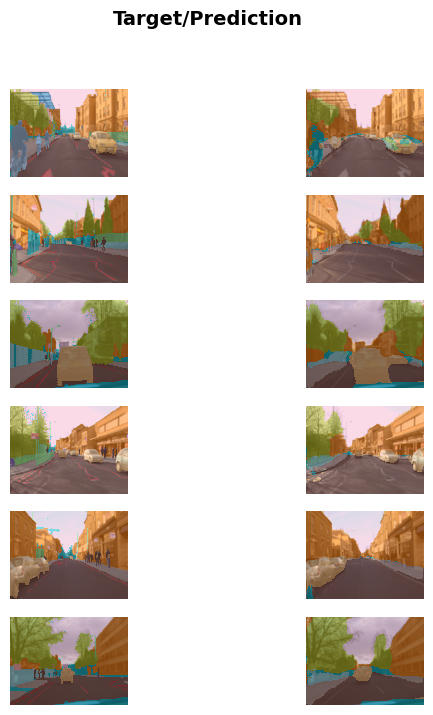

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))